In [13]:
import pandas as pd
import numpy as np

df1 = pd.DataFrame(
     {
         "A": ["A0", "A1", "A2", "A3"],
         "B": ["B0", "B1", "B2", "B3"],
         "C": ["C0", "C1", "C2", "C3"],
         "D": ["D0", "D1", "D2", "D3"],
     },
     index=[0, 1, 2, 3],
 )


df2 = pd.DataFrame(
{
"A": ["A4", "A5", "A6", "A7"],
"B": ["B4", "B5", "B6", "B7"],
"C": ["C4", "C5", "C6", "C7"],
"D": ["D4", "D5", "D6", "D7"],
    
},
index=[4, 5, 6, 7],
)

df3 = pd.DataFrame(
  {
         "A": ["A8", "A9", "A10", "A11"],
         "B": ["B8", "B9", "B10", "B11"],
         "C": ["C8", "C9", "C10", "C11"],
         "D": ["D8", "D9", "D10", "D11"],
     },
     index=[8, 9, 10, 11],
 )
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7", np.nan],
        "D": ["D2", "D3", "D6", "D7", "D9"],
        "F": ["F2", "F3", "F6", "F7", np.nan],
        "Z": ["D8", "D9", "D10", "D11", np.nan],
    },
    index=[2, 3, 6, 7, 9],
)

s1 = pd.Series(["X0", "X1", "X2", "X3"])
s2 = pd.Series(["X0", "X1", "X2", "X3"], index=["A", "B", "C", "D"], name='4')

frames = [df1, df2, df3]
# df = pd.concat(frames)

# result = pd.concat(frames, keys=["x", "y"])
# result

result = pd.concat([df1, df4], axis=0, join= 'inner') #, ignore_index=True)
result
# print(pd.concat([df4, s1], axis=0, ignore_index=True))
pieces = {"x": df1, "y": df2, "z": df3}

result1= pd.concat(pieces, keys=['x','z'])
result = pd.concat(
    frames, keys=["x", "y", "z"], levels=[["z", "y", "x", "x"]], names=["group_key"]
)
result1.index.levels
result.index.levels

print(pd.concat([df1, s2]))

     A    B    C    D    0
0   A0   B0   C0   D0  NaN
1   A1   B1   C1   D1  NaN
2   A2   B2   C2   D2  NaN
3   A3   B3   C3   D3  NaN
A  NaN  NaN  NaN  NaN   X0
B  NaN  NaN  NaN  NaN   X1
C  NaN  NaN  NaN  NaN   X2
D  NaN  NaN  NaN  NaN   X3


## Penggabungan Series/Dataframe

### Append
Method .append() dapat digunakan pada dataframe/series yang ditujukan untuk menambah row-nya saja. Jika di SQL memiliki 2 tabel atau lebih maka dapat menggabungkannya secara vertikal dengan Union. Jadi SQL Union ekuivalen dengan method .append() di Pandas.

In [15]:
import pandas as pd
# Buat series of int (s1) dan series of string (s2)
s1 = pd.Series([1, 2, 3, 4, 5, 6])
s2 = pd.Series(['a', 'b', 'c', 'd', 'e', 'f'])
# Terapkan method append
s2_append_s1 = s2.append(s1)
print("Series - append:\n", s2_append_s1)
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[3, 4] ,
		   'b':[1, 2]})
df2 = pd.DataFrame ({'a':[1, 2],
		   'b':[3, 4]})
# Terapkan method append
df2_append_df1 = df2.append(df1)
print("Dataframe - append:\n", df2_append_df1)

Series - append:
 0    a
1    b
2    c
3    d
4    e
5    f
0    1
1    2
2    3
3    4
4    5
5    6
dtype: object
Dataframe - append:
    a  b
0  1  3
1  2  4
0  3  1
1  4  2


C:\Users\PC\AppData\Local\Temp\ipykernel_12240\2614588442.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  s2_append_s1 = s2.append(s1)
C:\Users\PC\AppData\Local\Temp\ipykernel_12240\2614588442.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_append_df1 = df2.append(df1)


### Concat
Method .concat() dapat digunakan pada dataframe yang ditujukan untuk penggabungan baik dalam row-wise (dalam arah) atau column-wise.

In [ ]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1,2],
					'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
					'a':[3,4]})
# Terapkan method concat row-wise
row_wise_concat = pd.concat([df2, df1])
print("Row-wise - concat:\n", row_wise_concat)
# Terapkan method concat column-wise
col_wise_concat = pd.concat([df2, df1], axis = 1)
print("Column-wise - concat:\n", col_wise_concat)
# Penambahan identifier --> membentuk hasil penggabungan multiindex
multiindex_concat = pd.concat([df2, df1], axis = 0, keys=['df2', 'df1'])
print("Multiindex - concat:\n", multiindex_concat)

### Merge - Part 1
Method .merge() untuk menggabungkan Series/Dataframe yang bentuknya mirip dengan syntax join di SQL, specify left and right tables, join key, dan how to join (left, right, inner, full outer).

 

In [18]:
import pandas as pd

left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

print(pd.merge(left, right, how='cross'))

left = pd.DataFrame({"A": [1, 2], "B": [1, 2]})

right = pd.DataFrame({"A": [4, 5, 6], "B": [2, 2, 2]})

result = pd.merge(left, right, on="B", how="outer")
result

   key1_x key2_x   A   B key1_y key2_y   C   D
0      K0     K0  A0  B0     K0     K0  C0  D0
1      K0     K0  A0  B0     K1     K0  C1  D1
2      K0     K0  A0  B0     K1     K0  C2  D2
3      K0     K0  A0  B0     K2     K0  C3  D3
4      K0     K1  A1  B1     K0     K0  C0  D0
5      K0     K1  A1  B1     K1     K0  C1  D1
6      K0     K1  A1  B1     K1     K0  C2  D2
7      K0     K1  A1  B1     K2     K0  C3  D3
8      K1     K0  A2  B2     K0     K0  C0  D0
9      K1     K0  A2  B2     K1     K0  C1  D1
10     K1     K0  A2  B2     K1     K0  C2  D2
11     K1     K0  A2  B2     K2     K0  C3  D3
12     K2     K1  A3  B3     K0     K0  C0  D0
13     K2     K1  A3  B3     K1     K0  C1  D1
14     K2     K1  A3  B3     K1     K0  C2  D2
15     K2     K1  A3  B3     K2     K0  C3  D3


,A_x,B,A_y
0,1,1,NaN
1,2,2,4.0
2,2,2,5.0
3,2,2,6.0


## Merge - Part 2

terjadi kegagalan dalam merging kedua dataframe yang memiliki multi index.
 
Cara mengatasinya adalah dengan me-reset index pada kedua dataframe, kemudian merge akan mendeteksi common single/multi column di kedua dataframe dan melakukan merge.

In [ ]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
}).set_index(['key', 'val2'])
print('Dataframe 1:\n', df1)
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
}).set_index(['key', 'val3'])
print('Dataframe 2:\n', df2)
# Merge dataframe yang memiliki multi index
df_merge = pd.merge(df1.reset_index(), df2.reset_index())
print('Merging dataframe:\n', df_merge)

## Join

Method .join() digunakan pada dataframe untuk menggabungkan kedua data dengan set index pada kedua tabel tersebut sebagai join key, tanpa index, hal ini tidak akan berhasil.

Ini error jika index default pada kedua tabel
ValueError: columns overlap but no suffix specified: Index(['key'], dtype='object')

In [ ]:
import pandas as pd
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})
# Penerapan join dengan menggunakan set_index dan keyword how
join_df = df1.set_index('key').join(df2.set_index('key'), how='outer')
print(join_df)

## 

In [3]:
import pandas as pd

s1 = pd.Series(["a", "b"], dtype="category")

s2 = pd.Series(["a", "b", "a"], dtype="category")

s3 = pd.Series(["d", "c"], dtype="category")

pd.concat([s1, s3])
# pd.concat([s1, s2])

int_cats = pd.Series([1, 2], dtype="category")

float_cats = pd.Series([2.0, 3.0], dtype="category")

pd.concat([int_cats, float_cats])
# union_categoricals([s1.array])


left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)


right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)


result = right.join(left, on= key_or_key)
# result = pd.merge(left, right, left_index=True, how='outer')
result

NameError: name 'key_or_key' is not defined

In [18]:
import pandas as pd 
import numpy as np


left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key": ["K0", "K1", "K0", "K1"],
    }
)


right = pd.DataFrame({"C": ["C0", "C1", 'C2'], "D": ["D0", "D1", 'D2']}, index=["K0", "K1", 'k2'])

left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
    }
)


index = pd.MultiIndex.from_tuples(
    [("K0", "K0"), ("K1", "K0"), ("K2", "K0"), ("k2","K1")]
)


right = pd.DataFrame(
    {"C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]}, index=index
)

# result = left.join(right, on=["key1", 'key2'])
# result = pd.merge(left, right, left_on=['key1', 'key2'], right_index=True, how='left')
print(left)
print(right)
print(result)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
        C   D
K0 K0  C0  D0
K1 K0  C1  D1
K2 K0  C2  D2
k2 K1  C3  D3
       A   B key2   C   D
key1                     
K0    A0  B0   K0  C0  D0
K1    A2  B2   K0  C1  D1
K2    A3  B3   K1  C2  D2
K2    A3  B3   K1  C3  D3


In [19]:
import pandas as pd

left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]},
    index=pd.Index(["K0", "K1", "K2"], name="key"),
)


index = pd.MultiIndex.from_tuples(
    [("K0", "Y0"), ("K1", "Y1"), ("K2", "Y2"), ("K2", "Y3")],
    names=["key", "Y"],
)


right = pd.DataFrame(
    {"C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]},
    index=index,
)

# result = left.join(right, how='inner')
result = pd.merge(left.reset_index(), right.reset_index(), on='key').set_index(['key', 'Y'])
result


leftindex = pd.MultiIndex.from_product(
    [list("abc"), list("xy"), [1, 2]], names=["abc", "xy", "num"]
)


left = pd.DataFrame({"v1": range(12)}, index=leftindex)

rightindex = pd.MultiIndex.from_product(
    [list("abc"), list("xz")], names=["abc", "xy"]
)


right = pd.DataFrame({"v2": [100 * i for i in range(1, 7)]}, index=rightindex)

result = left.join(right, on=['abc', 'xy'], how='inner')
# print(left)
# print(right)
result


# leftindex = pd.MultiIndex.from_tuples(
#     [("K0", "X0"), ("K0", "X1"), ("K1", "X2")], names=["key", "X"]
# )


# left = pd.DataFrame(
#     {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=leftindex
# )


# rightindex = pd.MultiIndex.from_tuples(
#     [("K0", "Y0"), ("K1", "Y1"), ("K2", "Y2"), ("K2", "Y3")], names=["key", "Y"]
# )


# right = pd.DataFrame(
#     {"C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]}, index=rightindex
# )

# result = left.join(right, on=['key'])

left_index = pd.Index(["K0", "K0", "K1", "K2"], name="key1")

left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key2": ["K0", "K1", "K0", "K1"],
    },
    index=left_index,
)


right_index = pd.Index(["K0", "K1", "K2", "K2"], name="key1")

right = pd.DataFrame(
    {
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
        "key2": ["K0", "K0", "K1", "K1"],
    },
    index=right_index,
)


result = pd.merge(left, right, on=["key1", "key2"], suffixes=('_l', '_r'))
result

df1 = pd.DataFrame(
    [[np.nan, 3.0, 5.0], [-4.6, np.nan, np.nan], [np.nan, 7.0, np.nan]]
)


df2 = pd.DataFrame([[-42.6, 6.5, -8.2], [-5.0, 1.6, 4]], index=[1, 2])

result = df2.combine_first(df1)
result

,0,1,2
0,NaN,3.0,5.0
1,-42.6,6.5,-8.2
2,-5.0,1.6,4.0


In [23]:
import pandas._testing as tm

def unpivot(frame):
    N, K = frame.shape
    data = {
        "value": frame.to_numpy().ravel("F"),
        "variable": np.asarray(frame.columns).repeat(N),
        "date": np.tile(np.asarray(frame.index), K),
    }
    return pd.DataFrame(data, columns=["date", "variable", "value"])

df = unpivot(tm.makeTimeDataFrame(3))
df[df['variable'] == 'A']

,date,variable,value
0,2000-01-03,A,0.001268
1,2000-01-04,A,0.546464
2,2000-01-05,A,0.511115


## Dataset

In [45]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])
# Unique value pada setiap kolom data
for column in data.columns:
    print('Unique value %s: %s' % (column, data[column].unique()))

data

Unique value kelas: ['A' 'B']
Unique value murid: ['A1' 'A2' 'A3' 'B1' 'B2' 'B3']
Unique value pelajaran: ['math' 'english']
Unique value nilai: [ 90  60  70  85  50 100  40  95  80  45]


,kelas,murid,pelajaran,nilai
0,A,A1,math,90
1,A,A1,english,60
2,A,A2,math,70
3,A,A2,english,85
4,A,A3,math,50
5,A,A3,english,60
6,B,B1,math,100
7,B,B1,english,40
8,B,B2,math,95
9,B,B2,english,80


## Pivot
Untuk menerapkan menerapkan method .pivot() pada dataframe dapat dilakukan pada dataframe yang memiliki index tunggal ataupun index-nya adalah multi index.

In [ ]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting with single column measurement
pivot1 = data.pivot(index='murid', columns='pelajaran', values='nilai')
print('Pivoting with single column measurement:\n', pivot1)
# Pivoting with multiple column measurement
pivot2 = data.pivot(index='murid', columns='pelajaran')
print('Pivoting with multiple column measurement:\n', pivot2)

## Pivot_table
Apa yang terjadi kalau output pivot tabel memiliki duplicate index? Seperti yang diketahui, index di dataframe adalah unique identifier untuk setiap row, jadi tidak boleh ada duplikat dan setiap membuat pivot tabel, harus specify index as kolom yang mana dan columns-nya memakai kolom yang mana.

Hal ini dapat diatasi dengan melakukan method .pivot_table() pada dataframe. Metode ini sama seperti melakukan pivot pada tabel tapi juga melakukan groupby dan aggregation (aggfunc) pada level rows sehingga dipastikan tidak ada duplicate index di rows (secara default aggfunc = 'mean').
Keyword aggfunc yang digunakan pada method .pivot_table() dapat menggunakan nilai berikut:

sum
'mean'
'median'
 

In [7]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='mean'
pivot_tab_mean = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='mean')
print('Creating pivot table -- aggfunc mean:\n', pivot_tab_mean)
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='median'
pivot_tab_median = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='median')
print('Creating pivot table -- aggfunc median:\n', pivot_tab_median)
print(data)

Creating pivot table -- aggfunc mean:
 pelajaran    english  math
kelas                     
A          68.333333  70.0
B          55.000000  85.0
Creating pivot table -- aggfunc median:
 pelajaran  english  math
kelas                   
A               60    70
B               45    95
   kelas murid pelajaran  nilai
0      A    A1      math     90
1      A    A1   english     60
2      A    A2      math     70
3      A    A2   english     85
4      A    A3      math     50
5      A    A3   english     60
6      B    B1      math    100
7      B    B1   english     40
8      B    B2      math     95
9      B    B2   english     80
10     B    B3      math     60
11     B    B3   english     45


In [113]:
import pandas as pd
import numpy as np

columns = pd.MultiIndex.from_tuples(
    [
        ("A", "cat", "long"),
        ("B", "cat", "long"),
        ("A", "dog", "short"),
        ("B", "dog", "short"),
    ],
    names=["exp", "animal", "hair_length"],
)


df = pd.DataFrame(np.random.randn(4, 4), columns=columns)
df = df.stack()
df.index

columns = pd.MultiIndex.from_tuples(
    [
        ("A", "cat"),
        ("B", "dog"),
        ("B", "cat"),
        ("A", "dog"),
    ],
    names=["exp", "animal"],
)


index = pd.MultiIndex.from_product(
    [("bar", "baz", "foo", "qux"), ("one", "two")], names=["first", "second"]
)


# df = pd.DataFrame(np.random.randn(8, 4), index=index, columns=columns)
# df.stack(level='exp')
# df2 = df.iloc[[0, 1, 2, 4, 5, 7]]
# df3 = df.iloc[[0, 1, 4, 7], [2, 1]]
# print(df3.unstack())
# print("----------------------------------------------------------------")
# print(df[:3].unstack())
# print("----------------------------------------------------------------")
# print(df2.unstack())

cheese = pd.DataFrame(
    {
        "first": ["John", "Mary"],
        "last": ["Doe", "Bo"],
        "height": [5.5, 6.0],
        "weight": [130, 150],
    }
)
cheese.melt(id_vars='first')

dft = pd.DataFrame(
    {
        "A1970": {0: "a", 1: "b", 2: "c"},
        "A1980": {0: "d", 1: "e", 2: "f"},
        "B1970": {0: 2.5, 1: 1.2, 2: 0.7},
        "B1980": {0: 3.2, 1: 1.3, 2: 0.1},
        "X": dict(zip(range(3), np.random.randn(3))),
    }
)
dft['id'] = dft.index
# dft.melt(id_vars=['id', 'A1980'], value_vars='B1980')
cheese.melt(id_vars=['first', 'last'], var_name='Var_Height', value_vars='height', value_name='Burden')

,first,last,Var_Height,Burden
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0


## Melt - Part 1
Teknik melt melalui pd.melt() digunakan untuk mengembalikan kondisi data yang sudah dilakukan pivot menjadi sebelum pivot.

Mari diperhatikan kembali dataframe yang telah digunakan sebelumnya dan dataframenya sudah di pivot.

Dengan menspesifikasi keyword argument id_vars yang ditujukan untuk membuat fix kolom yang sebagai id tiap barisnya.

In [ ]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)
# [1] Melting dataframe data_pivot
data_melt_1 = pd.melt(data_pivot)
print('Melting dataframe:\n', data_melt_1)
# [2] Melting dataframe data_pivot dengan id_vars
data_melt_2 = pd.melt(data_pivot, id_vars='kelas')
print('Melting dataframe dengan idvars:\n', data_melt_2)

## Melt - Part 2
Mari melanjutkan ke bagian kedua dari penggunaan teknik melt ini. Mari lihat kembali dataframe yang telah diperoleh melalui pivoting

Dengan menspesifikasikan keyword argument value_vars yang digunakan untuk menampilkan variasi value apa saja yang perlu dimunculkan di kolom variable. 

Dengan spesifikasikan keyword argument var_name dan value_name yang digunakan untuk menampilkan nama kolom untuk variable dan value.

In [123]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas',columns='pelajaran',values='nilai', aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)
# [3.a] Melting dataframe data_pivot dengan value_vars
data_melt_3a = pd.melt(data_pivot, value_vars=['math'])
print('Melting dataframe dengan value_vars:\n', data_melt_3a)
# [3.b] Melting dataframe data_pivot dengan id_vars dan value_vars
data_melt_3b = pd.melt(data_pivot, id_vars='kelas', value_vars=['math'])
print('Melting dataframe dengan id_vars dan value_vars:\n', data_melt_3b)
# [4] Melting dataframe data_pivot dengan id_vars, value_vars, var_name. dan value_name
data_melt_4 = pd.melt(data_pivot, id_vars='kelas', value_vars=['english', 'math'], var_name='pelajaran', value_name='nilai')
print('Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:\n', data_melt_4)

pelajaran kelas    english  math
0             A  68.333333  70.0
1             B  55.000000  85.0


,kelas,pelajaran,value
0,A,english,68.333333
1,B,english,55.000000


## Stack & Unstack - Part 1
Konsep stacking dan unstacking sama dengan melt dan pivot secara berurutan, hanya saja tidak memasukkan index sebagai parameter di stack/unstack tapi harus set index terlebih dahulu, baru bisa melakukan stacking/unstacking dengan level yang bisa ditentukan sendiri.

In [132]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
print('Dataframe:\n', data)
	# Set index data untuk kolom kelas, murid, dan pelajaran
data = data.set_index(['kelas', 'murid', 'pelajaran'])
print('Dataframe multi index:\n', data)
# [1] Unstacking dataframe
data_unstack_1 = data.unstack()
print('Unstacking dataframe:\n', data_unstack_1)
# [2] Unstacking dengan specify level name
data_unstack_2 = data.unstack(level='murid')
print('Unstacking dataframe dengan level name:\n', data_unstack_2)
# [3] Unstacking dengan specify level position
data_unstack_3 = data.unstack(level=1)
print('Unstacking dataframe dengan level position:\n', data_unstack_3)

Dataframe:
                        nilai
kelas murid pelajaran       
A     A1    math          90
            english       60
      A2    math          70
            english       85
      A3    math          50
            english       60
B     B1    math         100
            english       40
      B2    math          95
            english       80
      B3    math          60
            english       45


   pelajaran
0  kelas                A
   english      68.333333
   math              70.0
1  kelas                B
   english           55.0
   math              85.0
dtype: object

## Stack & Unstack - Part 2
Dalam bagian kedua dari Stack & Unstack ini akan membahas stacking dataframe. Untuk itu, mari diperhatikan dataframe berikut ini:

In [ ]:
import pandas as pd
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
data = data.set_index(['kelas','murid','pelajaran'])
data_unstack = data.unstack(level=1)
print('Dataframe:\n', data_unstack)
# [1] Stacking dataframe
data_stack = data.stack()
print('Stacked dataframe:\n', data_stack)
# [2] Tukar posisi index setelah stacking dataframe
data_swap = data_stack.swaplevel(1,2)
print('Swapped data:\n', data_swap)
# [3] Melakukan sort_index pada stacking dataframe
data_sort = data_stack.sort_index()
print('Sorted data:\n', data_sort)

## QUIZ

In [14]:
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])

data = data.set_index(['kelas', 'murid', 'pelajaran'])
data.unstack([0,1])

nilai                     
kelas         A            B        
murid        A1  A2  A3   B1  B2  B3
pelajaran                           
english      60  85  60   40  80  45
math         90  70  50  100  95  60

In [41]:
columns = pd.MultiIndex.from_tuples(
    [
        ("A", "cat"),
        ("B", "dog"),
        ("B", "cat"),
        ("A", "dog"),
    ],
    names=["exp", "animal"],
)


index = pd.MultiIndex.from_product(
    [("bar", "baz", "foo", "qux"), ("one", "two")], names=["first", "second"]
)


df = pd.DataFrame(np.random.randn(8, 4), index=index, columns=columns)

In [47]:
z = df.groupby(level=1, axis=0).mean()
# print(z)

print(df.mean())

exp  animal
A    cat      -0.024395
B    dog       0.289636
     cat      -0.245157
A    dog       0.192849
dtype: float64


In [1]:
#Grouper

import datetime

df = pd.DataFrame(
    {
        "Branch": "A A A A A A A B".split(),
        "Buyer": "Carl Mark Carl Carl Joe Joe Joe Carl".split(),
        "Quantity": [1, 3, 5, 1, 8, 1, 9, 3],
        "Date": [
            datetime.datetime(2013, 1, 1, 13, 0),
            datetime.datetime(2013, 1, 1, 13, 5),
            datetime.datetime(2013, 10, 1, 20, 0),
            datetime.datetime(2013, 10, 2, 10, 0),
            datetime.datetime(2013, 10, 1, 20, 0),
            datetime.datetime(2013, 10, 2, 10, 0),
            datetime.datetime(2013, 12, 2, 12, 0),
            datetime.datetime(2013, 12, 2, 14, 0),
        ],
    }
)

df = df.set_index("Date")
df["Date"] = df.index + pd.offsets.MonthEnd(2)
print(df)
df.groupby([pd.Grouper(freq='6M', key='Date'), 'Buyer'])['Quantity'].sum()


NameError: name 'pd' is not defined

In [9]:
import pandas as pd
import numpy as np
import datetime

df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 6,
        "B": ["A", "B", "C"] * 8,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 4,
        "D": np.random.randn(24),
        "E": np.random.randn(24),
        "F": [datetime.datetime(2013, i, 1) for i in range(1, 13)]
        + [datetime.datetime(2013, i, 15) for i in range(1, 13)],
    }
)

table = df.pivot_table(
    index=["A", "B"],
    columns="C",
    values=["D", "E"],
    margins=True,
    aggfunc='mean'
)

table

D                             E                    
C             bar       foo       All       bar       foo       All
A     B                                                            
one   A  0.222155  0.918276  0.570215  0.295566  0.468431  0.381999
      B  0.285699 -0.236514  0.024592 -0.651396  0.157337 -0.247030
      C  1.415305 -0.443895  0.485705 -0.646753 -0.617490 -0.632122
three A  0.059976       NaN  0.059976 -0.293098       NaN -0.293098
      B       NaN -0.391754 -0.391754       NaN  0.444126  0.444126
      C -0.480161       NaN -0.480161  0.448240       NaN  0.448240
two   A       NaN  0.364930  0.364930       NaN  0.087618  0.087618
      B  0.414325       NaN  0.414325  0.318470       NaN  0.318470
      C       NaN  0.957751  0.957751       NaN -0.401658 -0.401658
All      0.319550  0.194799  0.257174 -0.088162  0.023061 -0.032551

## Review Inspeksi Data

In [ ]:
import pandas as pd
# Load data global_air_quality.csv
global_air_quality = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
print('Lima data teratas:\n', global_air_quality.head())
# Melakukan pengecekan terhadap data
print('Info global_air_quality:\n', global_air_quality.info())
# Melakukan count tanpa groupby
print('Count tanpa groupby:\n', global_air_quality.count())
# Melakukan count dengan groupby 
gaq_groupby_count = global_air_quality.groupby('source_name').count()
print('Count dengan groupby (5 data teratas):\n', gaq_groupby_count.head())

## Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 1

[1] Group berdasarkan country dan terapkan aggregasi mean, method .mean() setelah penerapan method .groupby() digunakan untuk mencari rata-rata dari tiap kelompok.

[2] Group berdasarkan country dan terapkan aggregasi std, method .std() setelah penerapan method .groupby() digunakan untuk mencari standard deviasi (penyimpangan) dari tiap kelompok.


In [ ]:
import pandas as pd
# Load data global_air_quality.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country', 'city', 'pollutant', 'value']].pivot_table(index=['country', 'city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# [1] Group berdasarkan country dan terapkan aggregasi mean
pollutant_mean = pollutant.groupby('country').mean()
print('Rata-rata pollutant (5 teratas):\n', pollutant_mean.head())
# [2] Group berdasarkan country dan terapkan aggregasi std
pollutant_std = pollutant.groupby('country').std().fillna(0)
print('Standar deviasi pollutant (5 teratas):\n', pollutant_std.head())/

## Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 2

[3] Group berdasarkan country dan terapkan aggregasi sum, method .sum() setelah penerapan method .groupby() digunakan untuk mencari total nilai dari tiap kelompok.

[4] Group berdasarkan country dan terapkan aggregasi nunique, method .nunique() setelah penerapan method .groupby() digunakan untuk mencari berapakah jumlah unique value dari tiap kelompok.

In [1]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# [3] Group berdasarkan country dan terapkan aggregasi sum
pollutant_sum = pollutant.groupby('country').sum()
print('Total pollutant (5 teratas):\n', pollutant_sum.head())
# [4] Group berdasarkan country dan terapkan aggregasi nunique
pollutant_nunique = pollutant.groupby('country').nunique()
print('Jumlah unique value pollutant (5 teratas):\n', pollutant_nunique.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Total pollutant (5 teratas):
           value                                                          
pollutant    bc        co       no2         o3   pm10       pm25      so2
country                                                                  
AR          0.0     0.000    0.0000   0.000000    0.0  18.100000    0.000
AU          0.0     0.000    0.0000   0.000000    0.0   3.900000    0.000
BA          0.0  2855.000  117.0000  35.000000  242.0   0.0

## Groupby dan Aggregasi dengan Fungsi Statistik Dasar - Part 3

[5] Group berdasarkan country dan terapkan aggregasi min, method .min() setelah penerapan method .groupby() digunakan untuk memunculkan nilai terkecil dari tiap kelompok.

[6] Group berdasarkan country dan terapkan aggregasi max, method .max() setelah penerapan method .groupby() digunakan untuk memunculkan nilai terbesar dari tiap kelompok.

Gunakanlah method .first() dan .last() untuk aggregasi setelah penerapan .groupby() yang masing-masingnya bertujuan untuk memunculkan item pertama dan item terakhir dari tiap kelompok.

In [8]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Group berdasarkan country dan terapkan aggregasi first
pollutant_first = pollutant.groupby('country').first()
print('Item pertama pollutant (5 teratas):\n', pollutant_first.head())
# Group berdasarkan country dan terapkan aggregasi last
pollutant_last = pollutant.groupby('country').last()
print('Item terakhir pollutant (5 teratas):\n', pollutant_last.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Item pertama pollutant (5 teratas):
           value                                            
pollutant    bc       co      no2        o3 pm10  pm25  so2
country                                                    
AR          0.0    0.000   0.0000  0.000000  0.0  18.1  0.0
AU          0.0    0.000   0.0000  0.000000  0.0   3.9  0.0
BA          0.0  141.000  19.0000  8.000000  0.0   0.0  0.0
CA          0.0    0.285   0.0024  0.048333  0.0   3.9  0.0
CL

## Groupby dengan Multiple Aggregations

Kali ini akan menggunakan grouby dengan multiple aggregations yang berupa kombinasi antara beberapa fungsi. Mari perhatikan contoh berikut ini!

Terapkanlah multiple aggregations pada dataframe pollutant dengan fungsi aggregasinya adalah 'min', 'median', 'mean', 'max'.

In [ ]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Group berdasarkan country dan terapkan aggregasi: min, median, mean, max
multiagg = pollutant.groupby('country').agg(['min', 'median', 'mean', 'max'])
print('Multiple aggregations (5 teratas):\n', multiagg.head())

## Groupby dengan Custom Aggregations

Dengan membuat sebuah Python function (user defined) dapat menggunakan sebagai custom aggregation pada dataframe yang telah di groupby.

In [17]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
# Create sebuah function: iqr
def iqr(series):
	Q1 = series.quantile(0.25)
	Q3 = series.quantile(0.75)
	return Q3 - Q1
# Group berdasarkan country dan terapkan aggregasi dari function: iqr
custom_agg = pollutant.groupby('country').agg(iqr)
print('Custom aggregation (5 teratas):\n', custom_agg.head())

Custom aggregation (5 teratas):
           value                                                  
pollutant    bc      co       no2        o3  pm10      pm25   so2
country                                                          
AR          0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
AU          0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
BA          0.0  297.75  14.25000  7.500000  79.0  0.000000  17.0
CA          0.0    0.00   0.00025  0.035708   0.5  3.876471   0.0
CL          0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0


## Groupby dengan Custom Aggregations by dict

Penggunaan custom aggregation lainnya pada dataframe yang telah di groupby dapat dilakukan dengan mempasskan sebuah dict yang berisi 'key' dict sebagai nama kolomnya dan 'value' dict adalah fungsi untuk aggregasi, baik user defined function atau yang telah tersedia.

Telah dimiliki dataset yang akan di apply teknik custom aggregation dengan menggunakan dict ini yaitu:

Akan apply teknik custom aggregation pada kolom 'o3' dan 'so' dengan fungsi aggregasi masing-masingnya adalah 'max' dan 'data_range'. Fungsi 'data_range' ini merupakan fungsi yang didefinisikan sendiri (user-defined) untuk menentukan jangkauan (range) data.

Tugas Praktik:

Dengan dataset yang masih sama seperti tersedia di code editor, tentukanlah median untuk kolom 'pm10' serta iqr untuk kolom 'pm25' dan 'so2'. Tampilkan pula 5 data teratas saja.

In [39]:
import pandas as pd
# Load data https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country','city','pollutant','value']].pivot_table(index=['country','city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# Function IQR
def iqr(series):
	return series.quantile(0.75) - series.quantile(0.25)
# Create custom aggregation using dict
custom_agg_dict = pollutant['value'][['pm25', 'pm10', 'so2']].groupby('country').agg({
   'pm25': iqr,
   'pm10': 'median',
   'so2':iqr
})
print('\nCetak 5 data teratas custom_agg_dict:\n', custom_agg_dict.head())

pollutant               bc      co     no2      o3     pm10     pm25     so2
country city                                                                
AR      Buenos Aires   0.0     0.0   0.000   0.000    0.000  18.1000   0.000
AU      Townsville     0.0     0.0   0.000   0.000    0.000   3.9000   0.000
BA      Goražde        0.0   141.0  19.000   8.000    0.000   0.0000   0.000
        Ilijaš         0.0     0.0   0.000   0.000  100.000   0.0000   0.000
        Jajce          0.0  1508.0  25.000   6.000    9.000   0.0000   0.000
...                    ...     ...     ...     ...      ...      ...     ...
XK      Hani i Elezit  0.0   137.0   0.000  81.130   14.524   0.0000   2.704
        Mitrovice      0.0    56.0   4.306  65.391   24.414  18.7260  37.086
        Peje           0.0   852.0   0.000  23.858    0.000   0.0000   0.000
        Prishtine      0.0     0.0   4.240  85.079    0.000  11.8235   8.354
        Prizren        0.0     0.0   0.000   0.000    0.000   0.0000   1.125

MultiIndex([('value',   'bc'),
            ('value',   'co'),
            ('value',  'no2'),
            ('value',   'o3'),
            ('value', 'pm10'),
            ('value', 'pm25'),
            ('value',  'so2')],
           names=[None, 'pollutant'])

## Load Dataset as Time Series
Terkadang Pandas salah mengenali object datetime menjadi object string dan pandas menjadi tidak bisa memanfaatkan full benefit dari time index.

Basic format datetime menurut ISO 8601: YYYY-mm-dd HH:MM:SS.

 

Terdapat beberapa cara untuk mengubah kolom waktu menjadi format yang benar as datetime object di Pandas. 

 

[1] read_csv, terdapat keyword argument 'parse_dates', yang jika di set True dan set index untuk kolom waktu tersebut maka kolom datetime tersebut akan transform as datetime Pandas dan menjadi index.

In [14]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv', parse_dates=True, index_col='timestamp')
# Cetak 5 data teratas
print(gaq.head())
# Cetak info dari dataframe gaq
# print('info')
gaq = gaq.reset_index()
print('---------------------------------------------------------------------------')
print(gaq['timestamp'])

                                                  location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-04-07 18:30:00+00:00      pm25  23.67  µg/m³   

## Convert to Datetime
Jika dataset yang telah terlebih dahulu atau telah terlanjur di load dengan pd.read_csv dan Pandas salah mengenali object datetime menjadi object string, maka dapat mengubah kolom tertentu dari dataset tersebut menjadi format datetime.

 

[2] pd.to_datetime digunakan untuk men-transform salah satu kolom di dataframe menjadi datetime Pandas dan kemudian set menjadi index. Mari perhatikan kembali contoh berikut:

In [1]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Cetak 5 data teratas
print('Sebelum diubah dalam format datetime:\n', gaq.head())
# Ubah menjadi datetime
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# Cetak 5 data teratas
print('Sesudah diubah dalam format datetime:\n', gaq.head())

Sebelum diubah dalam format datetime:
                           location       city country pollutant  value  \
0                  MOBILE-KICKAPOO    LINCOLN      US      pm10   7.00   
1                  Oxford St Ebbes     Oxford      GB       no2  30.00   
2                 BROADWAY (South)  St. Louis      US      pm25   6.10   
3  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN      pm25  23.67   
4                        Manglerud       Oslo      NO      pm10  27.06   

                 timestamp   unit source_name   latitude  longitude  \
0  2017-01-18 16:00:00 UTC  µg/m³      AirNow  35.488400 -97.090280   
1  2020-04-07 20:00:00 UTC  µg/m³       DEFRA  51.744804  -1.260278   
2  2020-04-07 19:00:00 UTC  µg/m³      AirNow  38.542500 -90.263610   
3  2020-04-07 18:30:00 UTC  µg/m³       caaqm  23.864016  78.802895   
4  2020-04-07 20:00:00 UTC  µg/m³      Norway  59.898690  10.814950   

   averaged_over_in_hours  
0                    1.00  
1                    1.00  
2    

Resampling untuk Time Series Data
Pandas time series juga memiliki fungsi resampling yang dapat berguna untuk:

[1] Downsampling

Mengurangi baris datetime menjadi frekuensi yang lebih lambat, bisa dibilang juga mengurangi rows dataset menjadi lebih sedikit

Contoh: mengubah kolom datetime yang awalnya daily menjadi monthly

 

[2] Upsampling

Kebalikan dari downsampling, menambah baris datetime menjadi frekuensi yang lebih cepat, menambah rows dataset dengan membuat kolom datetime menjadi lebih detail

Contoh: mengubah kolom datetime yang awalnya daily menjadi hourly

Dari resampling ini, kemudian dapat menerapkan metode statistik untuk transform value data yang ada (ex: mean, sum, count, etc).

Tabel resampling untuk time series:

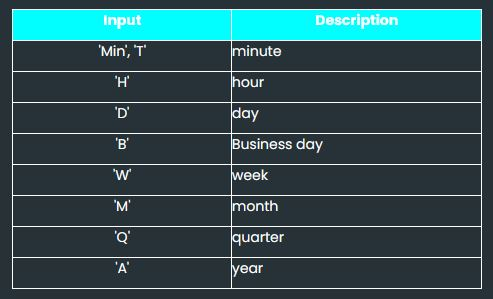



## Downsampling Data

[1] Daily to monthly

[2] Daily to yearly

In [13]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-downsampling (5 teratas):\n', gaq.head())
# [1] Downsampling dari daily to weekly dan kita hitung maksimum untuk seminggu
gaq_weekly = gaq.resample('W').max()
print('Downsampling daily to weekly - max (5 teratas):\n', gaq_weekly.head())
# [2] Downsampling dari daily to quarterly dan kita hitung minimumnya untuk tiap quarter
gaq_quarterly = gaq.resample('Q').min()
print('Downsampling daily to quarterly - min (5 teratas):\n', gaq_quarterly.head(10))

Dataset sebelum di-downsampling (5 teratas):
                                                   location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-0

C:\Users\PC\AppData\Local\Temp\ipykernel_9136\2844548523.py:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  gaq_weekly = gaq.resample('W').max()
C:\Users\PC\AppData\Local\Temp\ipykernel_9136\2844548523.py:11: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  gaq_quarterly = gaq.resample('Q').min()


## Upsampling Data

Di bagian sebelumnya kita telah melakukan proses downsampling. Proses upsampling akan kita bahas dalam bagian untuk dataset yang masih sama.


Kerjakanlah proses upsampling daily to hourly dan apply mean di code editor dengan jalan mengisi kode yang tidak lengkap (_ _ _).



In [17]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-upsampling (5 teratas):\n', gaq.head())
# Upsampling dari daily to hourly dan kita hitung reratanya
gaq_hourly = gaq.resample('H').mean()
print('Upsampling daily to hourly - mean (5 teratas):\n', gaq_hourly.head())

Dataset sebelum di-upsampling (5 teratas):
                                                   location       city country  \
timestamp                                                                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO    LINCOLN      US   
2020-04-07 20:00:00+00:00                  Oxford St Ebbes     Oxford      GB   
2020-04-07 19:00:00+00:00                 BROADWAY (South)  St. Louis      US   
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB      Sagar      IN   
2020-04-07 20:00:00+00:00                        Manglerud       Oslo      NO   

                          pollutant  value   unit source_name   latitude  \
timestamp                                                                  
2017-01-18 16:00:00+00:00      pm10   7.00  µg/m³      AirNow  35.488400   
2020-04-07 20:00:00+00:00       no2  30.00  µg/m³       DEFRA  51.744804   
2020-04-07 19:00:00+00:00      pm25   6.10  µg/m³      AirNow  38.542500   
2020-04-

## Resampling by Frequency

Pada bagian ini akan mempelajari bagaimanakah caranya me-resampling data (baik upsampling atau downsampling) berdasarkan frekuensi, misalnya sekali 2 minggu, tiap 12 jam, dsb.

[1] Data ini downsampling dari daily to 2 weekly, kemudian dihitung rata-ratanya, jika ada nilai NaN maka dapat diisi dengan fillna method = 'ffill'

[2] Selanjutnya, data awal di upsampling dari daily to 8 hourly, kemudian hitung rata-ratanya, jika ada nilai NaN maka dapat di isi dengan fillna method = 'bfill'

In [ ]:
import pandas as pd
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-resampling (5 teratas):\n', gaq.head())
# Resample dari daily to 2 monthly, hitung reratanya, dan fillna = 'bfill'
gaq_2monthly = gaq.resample('2M').mean().fillna(method='bfill')
print('Resampling daily to 2 monthly - mean - ffill (5 teratas):\n', gaq_2monthly.head())

Data (5 teratas):
 pollutant                   bc   co  no2   o3  pm10  pm25  so2
timestamp                                                     
2014-05-13 03:00:00+00:00  0.0  0.0  0.0  0.0   0.0   9.7  0.0
2014-08-12 20:00:00+00:00  0.0  0.0  0.0  0.0   0.0   7.1  0.0
2015-04-15 00:00:00+00:00  0.0  0.0  0.0  0.0   0.0  18.1  0.0
2015-08-21 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0  36.9  0.0
2015-09-13 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0   8.8  0.0


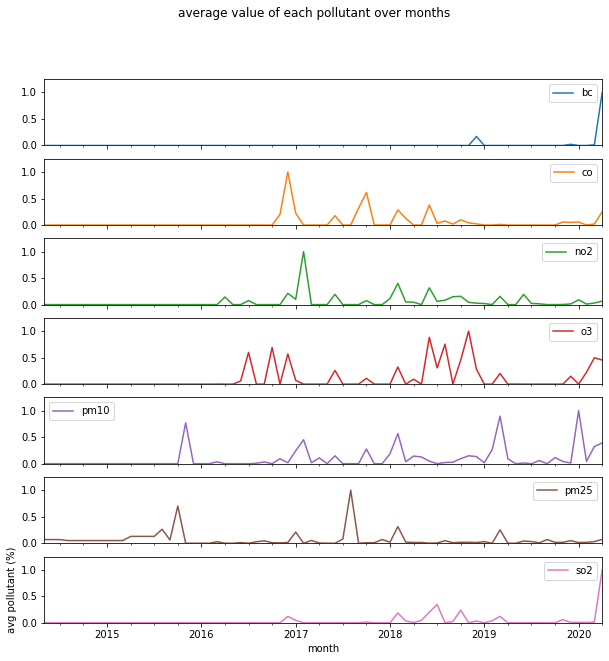

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# [1] Membuat pivot table yang menunjukkan waktu di baris nya dan masing-masing value dari pollutant nya dalam kolom
gaq_viz = gaq[['pollutant', 'value']].reset_index().set_index(['timestamp','pollutant'])
gaq_viz = gaq_viz.pivot_table(index='timestamp', columns='pollutant', aggfunc='mean').fillna(0)
gaq_viz.columns = gaq_viz.columns.droplevel(0)
print('Data (5 teratas):\n', gaq_viz.head())
# [2] Membuat fungsi yang memberikan default value 0 ketika value nya di bawah 0 dan apply ke setiap elemen dari dataset tersebut, kemudian menampilkannya sebagai chart
def default_val(val):
 if val < 0:
   return 0
 else:
   return val
line1 = gaq_viz.resample('M').mean().ffill().applymap(lambda x: default_val(x)).apply(lambda x: x/x.max()) # default value if value < 0 then 0, kemudian menghasilkan % value = value/max(value)
line1.plot(
   title = 'average value of each pollutant over months',
   figsize = (10, 10), #ukuran canvas 10px x 10px
   ylim = (0, 1.25), #memberikan batas tampilan y-axis hanya 0 sampai 125%
   subplots = True #memecah plot menjadi beberapa bagian sesuai dengan jumlah kolom
)
plt.ylabel('avg pollutant (%)')
plt.xlabel('month')
plt.show()

## QUIZ

<AxesSubplot:xlabel='timestamp'>

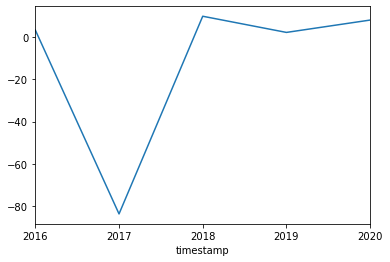

In [14]:
gaq.loc[gaq['pollutant'] == 'so2', 'value'].resample('A').mean().plot()

## Performa Penjualan di Setiap Cabang - Part 1
Diberikan 4 csv files yang isinya retail data untuk tiap quarter:

csv (data dari bulan January - March)       --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv
csv (data dari bulan April - June)              --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv
csv (data dari bulan July - September)      --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv
csv (data dari bulan October - December)  --> https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv
 

Goal: Automation untuk pembuatan grafik dari measurement yang dibutuhkan.

 

Untuk part 1 ini yang perlu dilakukan:

[1]. Load masing-masing data *.csv dengan Pandas

[2]. Pengecekan dan Transformasi Data 

Cek data sekilas (melihat bentuk data biasanya 5 data teratas)
Cek list kolom untuk semua dataframe apakah seluruh kolom dari keempat dataframe yang terpisah itu sama
Jika sama digabungkan.
Cek informasi dataframe yang telah digabungkan
Statistik deskriptif dari dataframe yang telah digabungkan.
Untuk representasi string gunakan kutip satu, misalnya: 'contoh string'.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# [1]. Load masing-masing data dengan pandas
retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_1_until_3_reduce.csv')
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_4_until_6_reduce.csv')
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_7_until_9_reduce.csv')
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/10%25_original_randomstate%3D42/retail_data_from_10_until_12_reduce.csv')

# [2]. Pengecekan Data
print('PENGECEKAN DATA\n\n')
#      Cek data sekilas (tampilkan 5 baris teratas)
print(retail_data1.head())
print(retail_data2.head())
print(retail_data3.head())
print(retail_data4.head())
#      Cek list kolom untuk semua dataframe
print('Kolom retail_data1: %s' %retail_data1.columns)
print('Kolom retail_data2: %s' %retail_data2.columns)
print('Kolom retail_data3: %s' %retail_data3.columns)
print('Kolom retail_data4: %s' %retail_data4.columns)
#      Concat multiple dataframe menjadi 1 dataframe
retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])
print('\nJumlah baris:', retail_table.shape[0])
#      Pengecekan dataframe info
print('\nInfo:')
print(retail_table.info())
#      Pengecekan statistik deskriptif
print('\nStatistik deskriptif:\n', retail_table.describe())

PENGECEKAN DATA


   order_id order_date  customer_id       city     province product_id  \
0   1612885   01-01-19        16293     Malang   Jawa Timur      P1301   
1   1612387   01-01-19        17228      Bogor   Jawa Barat      P2086   
2   1612903   01-01-19        16775  Surakarta  Jawa Tengah      P1656   
3   1612963   01-01-19            0    unknown      unknown      P3127   
4   1612915   01-01-19            0    unknown      unknown      P1230   

     brand  quantity  item_price  total_price  
0  BRAND_F         6      747000      4482000  
1  BRAND_L         4      590000      2360000  
2  BRAND_G         3     1325000      3975000  
3  BRAND_S         1     1045000      1045000  
4  BRAND_E         1     -891000       891000  
   order_id order_date  customer_id           city     province product_id  \
0   1637140   01-04-19            0        unknown      unknown      P1656   
1   1637515   01-04-19        14606  Jakarta Barat  DKI Jakarta      P3286   
2   1637692   0

## Performa Penjualan di setiap Cabang - Part 2
Melanjutkan penyelesaian persoalan ke langkah berikutnya.

[3] Transformasi Data 

Jika ada data yang tidak seharusnya maka dapat dibuang
Jika ada kolom yang seharusnya bertipe datetime64 ubahlah
Cek kembali informasi dataframe 
Tampilkan kembali statistik deskriptif dari dataframe
Untuk representasi string gunakan kutip satu, misalnya: 'contoh string'.

 

Sebagai kontrol, informasi terakhir (baris 32) berikut dengan statistik deskriptif (baris 34) adalah:


In [2]:
# [3]. Transformasi Data
print('TRANSFORMASI DATA\n\n')
#      Memastikan data yang memiliki item_price < 0 atau total_price < 0
cek = retail_table.loc[(retail_table['item_price'] < 0) | retail_table['total_price'] < 0]
print('\nitem_price < 0 atau total_price < 0:\n', cek)
#      Jika tidak masuk akal datanya dapat dibuang
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0 )]
# #      Cek apakah masih ada order_id yang bernilai undefined dan delete row tersebut
cek = retail_table.loc[retail_table['order_id'] == 'undefined']
print('\norder_id yang bernilai undefined:\n', cek)
#      Jika ada maka buang baris tersebut
if cek.shape[0] != 0:
	retail_table = retail_table.loc[retail_table['order_id'] != 'undefined']

#      Transform order_id menjadi int64
retail_table['order_id'] = retail_table['order_id'].astype('int64')
#      Transform order_date menjadi datetime Pandas
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])
#      Cek dataframe info kembali untuk memastikan
print('\nInfo:')
print(retail_table.info())
#      Cek statistik deskriptif kembali, untuk memastikan
print('\nStatistik deskriptif:\n', retail_table.describe())

TRANSFORMASI DATA



item_price < 0 atau total_price < 0:
 Empty DataFrame
Columns: [order_id, order_date, customer_id, city, province, product_id, brand, quantity, item_price, total_price]
Index: []

order_id yang bernilai undefined:
     order_id order_date  customer_id           city     province product_id  \
9  undefined   01-07-19        15150  Jakarta Pusat  DKI Jakarta      P3694   

     brand  quantity  item_price  total_price  
9  BRAND_T        12      159000      1908000  

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 50855 entries, 0 to 20182
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     50855 non-null  int64         
 1   order_date   50855 non-null  datetime64[ns]
 2   customer_id  50855 non-null  int64         
 3   city         50855 non-null  object        
 4   province     50855 non-null  object        
 5   product_id   50855 non-null  object        
 

## Performa Penjualan di setiap Cabang - Part 3
Mari lanjutkan ke langkah berikutnya.

[4]. Filter province yang hanya termasuk 5 provinsi besar di Jawa (DKI Jakarta, Jawa Barat, Jawa Tengah, Jawa Timur, dan Yogyakarta)

[5]. Mengelompokkan data berdasarkan order_date dan province yang sudah di filter dan menghitung order unique count, customer unique count, product unique count, brand unique count, dan GMV (Gross Merchandise Volume = total_price untuk semua penjualan)

[6]. Melakukan unstack untuk mendapatkan order_date di bagian baris dan province di bagian column

 

Untuk string direpresentasikan dengan kutip satu, misalnya 'contoh string'.

In [3]:
# [4]. Filter hanya 5 province terbesar di pulau Jawa
print('\nFILTER 5 PROVINCE TERBESAR DI PULAU JAWA\n')
java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]
#      Untuk memastikan kolom provinsi isinya sudah sama dengan java
print(retail_table.head())

# [5]. Kelompokkan sesuai dengan order_date dan province kemudian aggregasikan
groupby_city_province = retail_table.groupby(['order_date', 'province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': 'sum'
})
#      Ubah nama kolomnya menjadi 'order','customer','product','brand','GMV'
groupby_city_province.columns = ['order','customer','product','brand','GMV']
print('\ngroupby_city_province (10 data teratas):\n', groupby_city_province)

# [6]. Unstack untuk mendapatkan order_date di bagian baris dan province di bagian column
unstack_city_province = groupby_city_province.unstack('province').fillna(0)
print('\nunstack_city_province (5 data teratas):\n', unstack_city_province.head())


FILTER 5 PROVINCE TERBESAR DI PULAU JAWA

    order_id order_date  customer_id           city     province product_id  \
0    1612885 2019-01-01        16293         Malang   Jawa Timur      P1301   
1    1612387 2019-01-01        17228          Bogor   Jawa Barat      P2086   
2    1612903 2019-01-01        16775      Surakarta  Jawa Tengah      P1656   
9    1612702 2019-01-01        18119     Yogyakarta   Yogyakarta      P3813   
14   1612951 2019-01-01        16125  Jakarta Barat  DKI Jakarta      P1902   

      brand  quantity  item_price  total_price  
0   BRAND_F         6      747000      4482000  
1   BRAND_L         4      590000      2360000  
2   BRAND_G         3     1325000      3975000  
9   BRAND_U         1      450000       450000  
14  BRAND_J        10      695000      6950000  

groupby_city_province (10 data teratas):
                         order  customer  product  brand         GMV
order_date province                                                
2019-01-0

## Performa Penjualan di setiap Cabang - Part 4
Ayo lanjutkan ke langkah berikutnya:

[7]. Slicing data untuk masing-masing measurement (kolom), misal: kolom order

[8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan secara bulanan

 

Untuk string direpresentasikan dengan kutip satu, misalnya 'contoh string'.

In [4]:
# [7]. Slicing data untuk masing-masing measurement, misal: order
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,idx['order']]
print('\nby order (5 data teratas):\n', by_order.head())

# # [8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
by_order_monthly_mean = by_order.resample('M').mean()
print('\nby_order_monthly_mean (5 data teratas):\n', by_order_monthly_mean.head())


by order (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-01         21.0         6.0          3.0         3.0         4.0
2019-01-02         10.0         7.0          1.0         2.0         1.0
2019-01-03          9.0         2.0          8.0         4.0         3.0
2019-01-04         18.0         5.0          5.0         0.0         4.0
2019-01-05         13.0         7.0          2.0         2.0         2.0

by_order_monthly_mean (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-31    14.052632    5.684211     2.631579    2.210526    3.052632
2019-02-28    17.043478    5.956522     2.043478    2.652174    3.130435
2019-03-31    18.259259    5.296296     2.555556    2.777778    2.703704
2019-04-30    18.269231    6.653846     3.153846    2

## Performa Penjualan di setiap Cabang - Part 5
Sekarang dilanjutkan untuk langkah #[9] yaitu menampilkan grafik dari langkah #[8] yang telah dilakukan.

[9]. Plot untuk hasil pada langkah #[8]

Untuk string direpresentasikan dengan kutip satu, misalnya 'contoh string'.

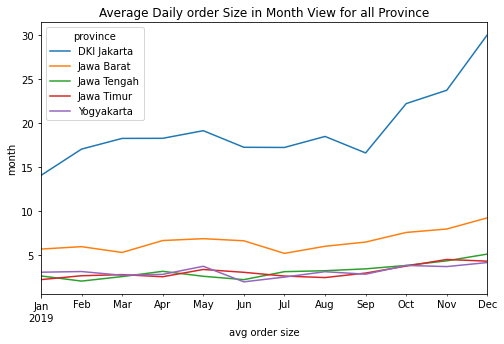

In [5]:
# [9]. Plot untuk hasil pada langkah #[8]
by_order_monthly_mean.plot(
   figsize = (8,5),
   title = 'Average Daily order Size in Month View for all Province'
#     subplots= True
)
plt.ylabel('month')
plt.xlabel('avg order size')
plt.show()

## Performa Penjualan di setiap Cabang - Part 6
Langkah 7 s/d 9 yang telah dilakukan baru untuk satu measurement yaitu order. Berarti ada empat kali lagi kode seperti ini harus dibuat. Karena struktur code masih sama, dapat menggunakan perulangan sesuai dengan jumlah measurement yaitu 5, sehingga kelima measurement dapat ditampilkan grafiknya dalam satu canvas figure.

Mari memulai dengan membuat sebuah perulangan dengan dataframe unstack_city_province yang digunakan (hasil dari langkah ke 5 di part 2).

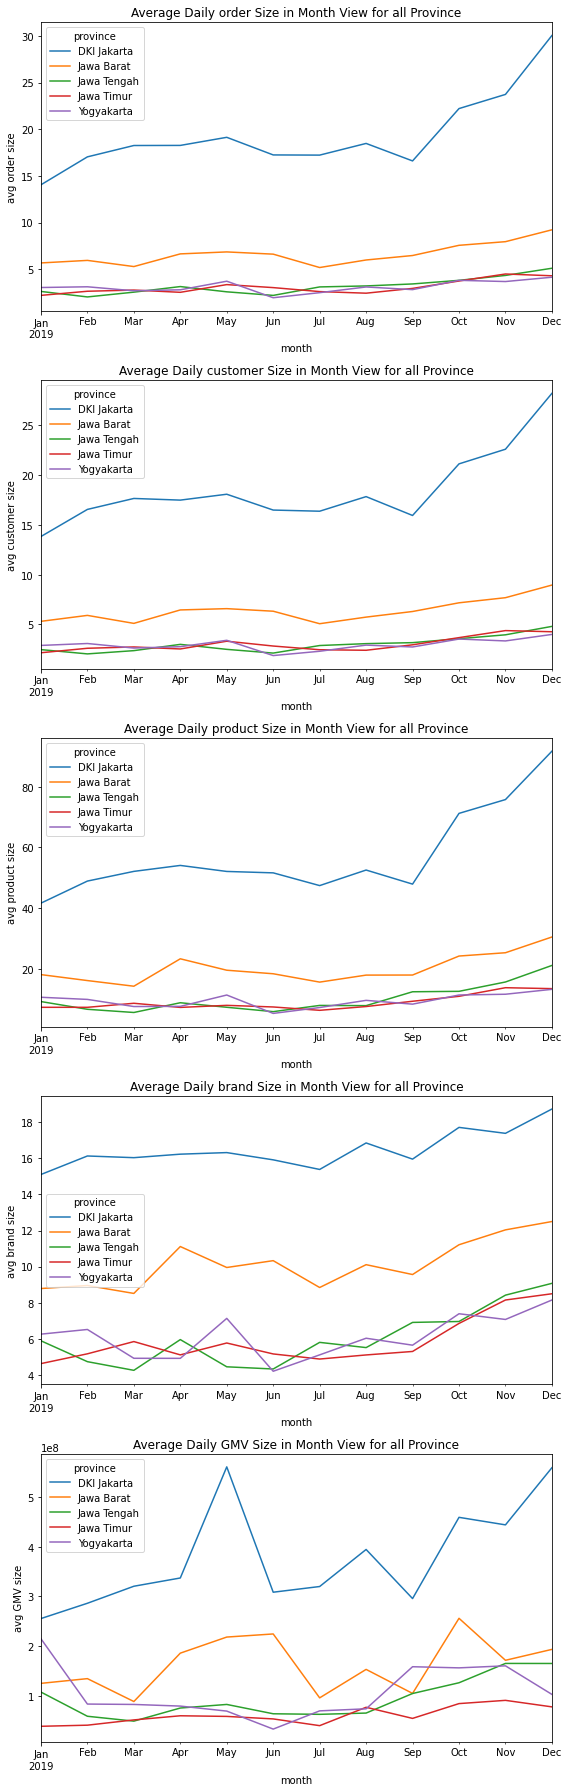

In [6]:
# Create figure canvas dan axes for 5 line plots
fig, axes = plt.subplots(5, 1, figsize=(8, 25))

# Slicing index
idx = pd.IndexSlice
for i, measurement in enumerate(groupby_city_province.columns):
    # Slicing data untuk masing-masing measurement
    by_measurement = unstack_city_province.loc[:,idx[measurement]]
    # Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
    by_measurement_monthly_mean = by_measurement.resample('M').mean()
    # Plot by_measurement_monthly_mean
    by_measurement_monthly_mean.plot(
        title = 'Average Daily ' + measurement + ' Size in Month View for all Province',
        ax = axes[i]
    )
    axes[i].set_ylabel('avg ' + measurement + ' size')
    axes[i].set_xlabel('month')

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-01         21.0         6.0          3.0         3.0         4.0
2019-01-02         10.0         7.0          1.0         2.0         1.0
2019-01-03          9.0         2.0          8.0         4.0         3.0
2019-01-04         18.0         5.0          5.0         0.0         4.0
2019-01-05         13.0         7.0          2.0         2.0         2.0
...                 ...         ...          ...         ...         ...
2019-12-26         39.0        15.0          5.0        13.0         3.0
2019-12-27         33.0        10.0         10.0         4.0         5.0
2019-12-29         25.0        10.0          2.0         0.0         4.0
2019-12-30         48.0         9.0          8.0         4.0         5.0
2019-12-31         41.0         8.0          4.0         7.0         3.0

[297 rows x 5 columns]
province    DKI Jakarta  Ja

                        order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     21        20       40     16   357607000
           Jawa Barat       6         6       21      9    94335000
           Jawa Tengah      3         3       19     11    53933000
           Jawa Timur       3         3        9      9    69116000
           Yogyakarta       4         3       10      6  2884114000
...                       ...       ...      ...    ...         ...
2019-12-31 DKI Jakarta     41        41      131     19  1162061000
           Jawa Barat       8         7       16     12    90461000
           Jawa Tengah      4         4       13      7    61055000
           Jawa Timur       7         7       26     13   196597000
           Yogyakarta       3         3        5      4    37650000

[1404 rows x 5 columns]


## Hasil Belajarku :)
Walau harus bekerja keras, aku cukup puas dengan hasil kerjaku hari ini. Aku memandangi kode final yang sudah selesai kukerjakan. Diam-diam ada perasaan bangga menyelip di benakku! YES!

Akhirnya, aku telah menyelesaikan modul Data Manipulation with Pandas - Part 2. Materi-materi yang telah kupelajari dan praktikkan dalam modul ini aku telah mendapatkan pengetahuan (knowledge) dan praktek (skill) untuk:

Dapat menerapkan teknik penggabungan data antar Series dan Dataframe dengan menggunakan concat, merge dan join.
Dapat memahami konsep dan menerapkan teknik pivot, melt, stack dan unstack pada dataframe untuk memformat ulang bentuk data.
Dapat memahami konsep dan menerapkan teknik groupby dan aggregation untuk mengurangi jumlah data.
Mengenal dan memahami konsep time series di Pandas
Latihan dalam mengerjakan project bisnis sederhana menggunakan pandas
 

Ada juga sejumlah catatan yang perlu aku ingat, yaitu

Jikalau terdapat berbagai multiple source untuk extract 1 informasi, maka pastikan struktur datanya adalah sama, list column dan data types.
Mengerti business understanding-nya sehingga jika diperlukan melakukan join maka bisa melakukan join dengan efektif dan tepat
Mengerti tujuan analisisnya sehingga bisa melakukan aggregation dan transform data (pivot, melt, etc) data dengan tepat dan efektif
Sebisa mungkin selalu set index pada kolom datetime sehingga slicing menjadi lebih mudah dan melakukan hal lain seperti downsampling ataupun upsampling
Selalu gunakan automation jika memungkinkan karena itu akan mempermudah hidupmu dan menghemat waktu
 

Pesan dari data mentor Karl Christian:

“Data Manipulation is redundant tasks if you have to specify all the parameters one by one, the key is trying to figure out the first phase, then replicate that command become a function that you can call to create a scalable output. This process can be called as Automation.”  By KARL CHRISTIAN, 2020

## 